In [1]:
# importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# loading dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]
print('Training set size', ndata_train)
print('Testing set size', ndata_test)

11501568/11490434 [==============================] - 0s 0us/step
Training set size 60000
Testing set size 10000


### Checking image for each number

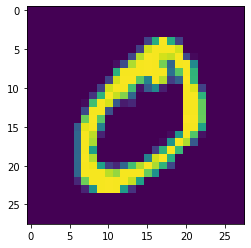

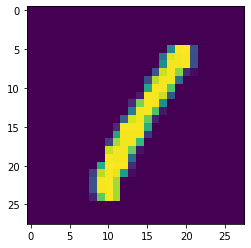

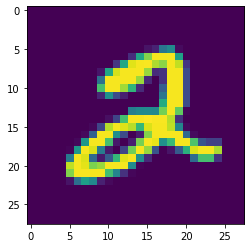

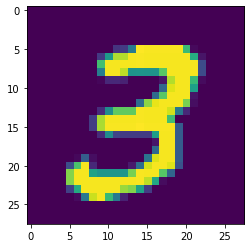

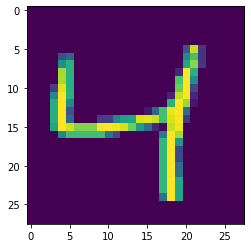

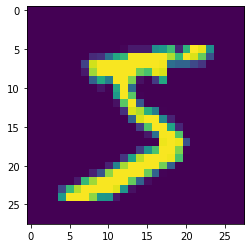

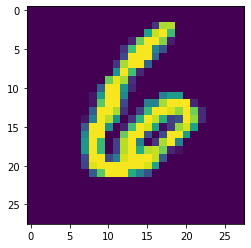

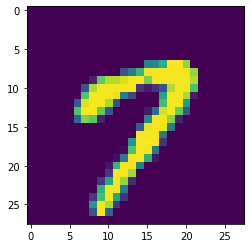

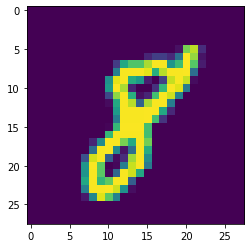

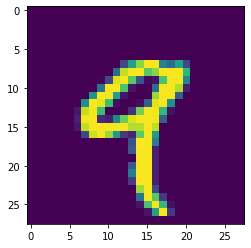

In [5]:
# image for each numbers
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.imshow(x_train[idx, :, :])
    plt.show()

In [6]:
# reshape image for different color channel
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]

## CNN network - Tuning

Trying out different networks with different combinations of hyperparameters -  # of layers, filter sizes, # of filters, dense layer combinations, dropout ratio & batch sizes

Hyperparameter tuning will be done in two steps - 
1. An initial network structure will be picked with # of layers, choice of activation function and regularizers.
2. Once network is fixed, other hyperparameters like epoch, batch sizer, number of nodes in each dense layer, # of filter in convolution layers, dropout ratio and regularizer penalty will be tried out to identify the best set of parameters for the network

Once best parameters are identified in the network, based on last epoch validation accuracy, each network will be compared to pick the best for testing.

In [7]:
model1 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Conv2D(filters=20,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(32,activation=tf.nn.softplus, kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

model1.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=100) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 128)               6

In [8]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Conv2D(filters=20,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(32,activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

model2.fit(x_train,y_train,epochs=15,validation_split=0.2,batch_size=50) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 20)        1820      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 20)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [9]:
model3 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(32,activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

model3.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=100) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [10]:
model4 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dense(32,activation=tf.nn.softplus),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

model4.fit(x_train,y_train,epochs=20,validation_split=0.2,batch_size=50) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               991360    
                                                      

In [16]:
model5 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2, padding='same'),
        tf.keras.layers.Dropout(0.15),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation=tf.nn.relu),
        tf.keras.layers.Dense(32,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

model5.fit(x_train,y_train,epochs=10,validation_split=0.2,batch_size=50) 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 2, 2, 128)       

The above configuration consistenly gives valiadtion accuracy of more than 99%, hence will be finally used to train the complete dataset and measuring accuracy on the test dataset.

In [17]:
final_model = model5

The final model selected has three convolution layers, the first one with a filter of size 5x5 and the other two with 3x3. Each convolution later is followerd by a 2x2 max pooling layer with valid padding to have a high enough dimention feature map. A dropout layer with a rate of 0.15 is added before fully connected part of the network starts to reduce overfitting. No regularizers are used, unlike the previous network tried. The use of regularizer along with dropout layer were seem to reduce the learning.

The best model picked have lesser number of total parameters than other networks but still gives a better accuracy. This indicates that just by having a network with higher number of parameters doesn't ensure an improvement over accuracy.

## CNN network - Results

In [18]:
# fitting final model structure to complete training dataset
final_model.fit(x_train,y_train,epochs=10,batch_size=50) 

Epoch 1/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0185 - accuracy: 0.9944
Epoch 2/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0159 - accuracy: 0.9952
Epoch 3/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0114 - accuracy: 0.9964
Epoch 4/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0105 - accuracy: 0.9969
Epoch 5/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0113 - accuracy: 0.9967
Epoch 6/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0113 - accuracy: 0.9963
Epoch 7/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0092 - accuracy: 0.9972
Epoch 8/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0087 - accuracy: 0.9974
Epoch 9/10
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 10/10
1200/1200 [==============================] - 11s 9ms/step - l

In [19]:
# getting predicted probabilities for test set
y_test_prob = final_model.predict(x_test)

# getting final prediction number
y_test_pred = y_test_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy on test set is', round(100*accuracy_score(y_test, y_test_pred), 2), '%')

Accuracy on test set is 99.31 %


The final model chooses performs even better than the validation set with a test accuracy of **99.31%** compared with last epoch validation accuracy of **99.18%**. 

In [20]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



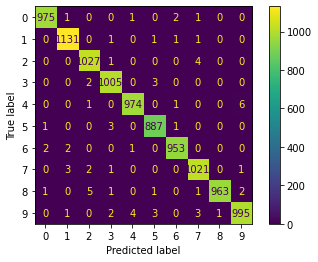

In [21]:
# confusion matrix to identify common misclassification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
d_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
d_cm.plot()
plt.show()

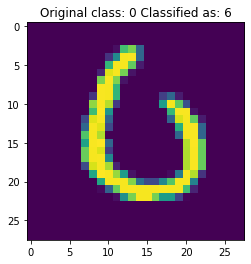

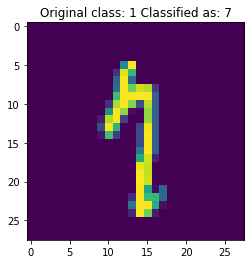

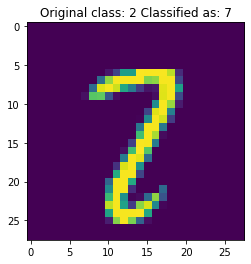

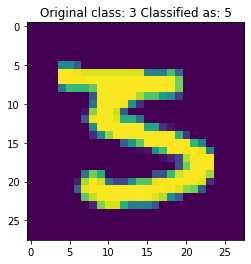

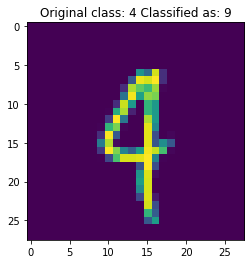

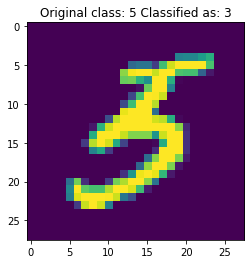

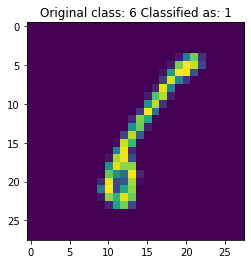

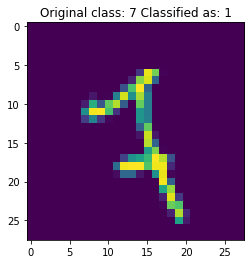

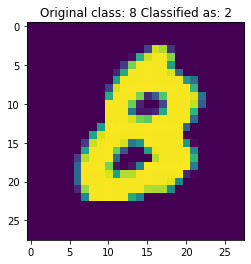

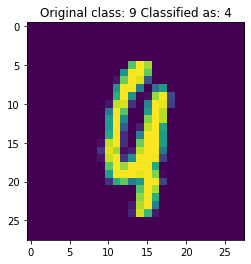

In [22]:
# getting most misclassified label for each number
most_misclassified = cm.argsort()[:, -2]

# combining actual and predicted into df
prediction = pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

# visualizing common misclassification
for i in range(10):
  try:
    idx = prediction.query('y_test == {}'.format(i)).\
      query('y_test_pred == {}'.format(most_misclassified[i])).index.values[0]
  except:
    print('No misclassification for number: ', i)
    continue

  plt.title('Original class: {} Classified as: {}'.format(i, most_misclassified[i]))
  plt.imshow(x_test[idx, :, :, 0])
  plt.show()


The most common mix-up in predicting the numbers are (with more than 3 mixups) - 
1. 4 <-> 9
2. 7 <-> 2
3. 8 <-> 2


Digit prediction can't have a 100% accuracy as any algorithm is bound to confuse certain similar digit with each other based on the observed. The trained model gives an accuracy of 99.31% on test dataset but getting 100% accuracy will not just depend on the model but will also dependent on the dataset. As seen above, some images may evendently resmeble something else, even to a human. If there is no significant overlap between the structure of each image then it could be possible to have a 100% accuracy.